# The Spark Foundation

## Name : Huma Urooj 
## Batch : August 2024

## Task 2

## Prediction Using Unsupervised ML
### From the given Iris data set , predict the optimum numbers of clusters and represent it visually

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [31]:
df = pd.read_csv("Iris (1).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.shape

(150, 6)

In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [42]:

data = df.iloc[:,1:5]

### Elbow Method:

* Create a list to store WCSS values.
* Iterate through different values of k (1 to 10).
* Create a K-means model for each k and fit it to the data.
* Append the WCSS value to the list.
* Plot the WCSS values against the number of clusters.

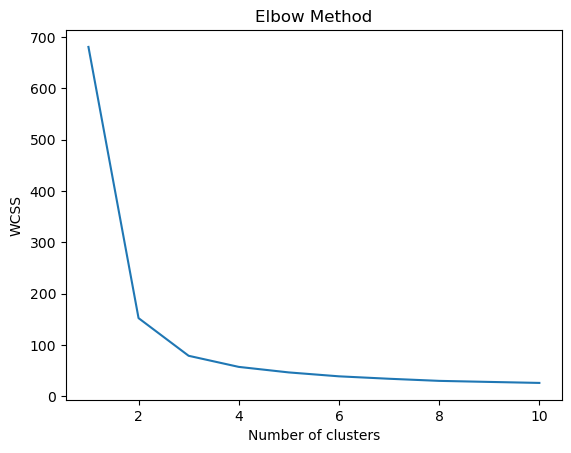

In [43]:
# Create a list to store the WCSS values
wcss = []

# Calculate WCSS for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter = 300, n_init = 10, random_state= 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
 

In [44]:
wcss

[680.8244000000001,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.19698216257427,
 30.083825236167343,
 28.0328026629996,
 26.081818181818186]

### K-means Clustering:
* Create a K-means model with the determined number of clusters i.e 3 .
* Fit the model to the data.
* Add a new column to the DataFrame for cluster labels.
* visualize the clusters.

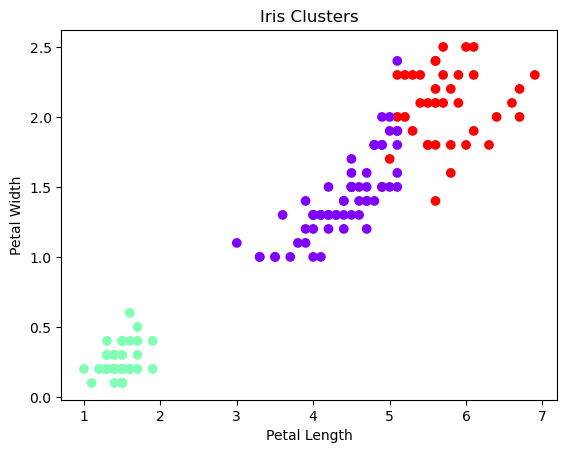

In [45]:
# Create a K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)

# Add a new column to the DataFrame for the cluster labels
data['cluster'] = kmeans.labels_

# Visualize the clusters (optional)
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Clusters')
plt.show()
